# Module 4: Evaluation Metrics for Classification

This notebook contains an exploration into methods for evaluating performance of binary classification problems.

## 4.1 Evaluation metrics: session overview

In the last module we looked at a binary classification problem (churn prediction) where we evaluated the model performance based on accuracy. In this module we will dive into what other metrics can be used to evaluate binary classification model performance.

First we will implement the model we built in the last module, and this will be the starting point of our analysis.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('../03_Classification/data/Customer-Churn-Dataset.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/shanice/projects/ml-zoomcamp/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()



np.float64(0.801277501774308)

## 4.2 Accuracy and dummy model

In [8]:
len(y_val)

1409

In [9]:
# Accuracy
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

In [10]:
(y_val == churn_decision).sum()

np.int64(1129)

In [11]:
1129/1409

0.801277501774308

What happens to accuracy if we move our decision boundary?

In [12]:
# Create an array of values for thresholds between O and 1
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [13]:
threshold_accuracies = {}
for t in thresholds:
    churn_decision = (y_pred >= t)
    threshold_accuracies[t] = (y_val == churn_decision).mean()

In [14]:
threshold_accuracies

{np.float64(0.0): np.float64(0.2739531582682754),
 np.float64(0.05): np.float64(0.5088715400993612),
 np.float64(0.1): np.float64(0.5982966643009227),
 np.float64(0.15000000000000002): np.float64(0.6635911994322214),
 np.float64(0.2): np.float64(0.7068843151171044),
 np.float64(0.25): np.float64(0.7374024130589071),
 np.float64(0.30000000000000004): np.float64(0.759403832505323),
 np.float64(0.35000000000000003): np.float64(0.765791341376863),
 np.float64(0.4): np.float64(0.7799858055358411),
 np.float64(0.45): np.float64(0.7934705464868701),
 np.float64(0.5): np.float64(0.801277501774308),
 np.float64(0.55): np.float64(0.7984386089425124),
 np.float64(0.6000000000000001): np.float64(0.7970191625266146),
 np.float64(0.65): np.float64(0.7842441447835344),
 np.float64(0.7000000000000001): np.float64(0.7650816181689141),
 np.float64(0.75): np.float64(0.7437899219304471),
 np.float64(0.8): np.float64(0.7295954577714692),
 np.float64(0.8500000000000001): np.float64(0.7260468417317246),
 np.

In [15]:
threshold_df = pd.DataFrame.from_dict(threshold_accuracies, orient='index',
                                      columns=['accuracy'])

In [16]:
threshold_df

,accuracy
0.00,0.273953
0.05,0.508872
0.10,0.598297
0.15,0.663591
0.20,0.706884
0.25,0.737402
0.30,0.759404
0.35,0.765791
0.40,0.779986
0.45,0.793471


Text(0.5, 1.0, 'Decision Threshold v Validation Accuracy')

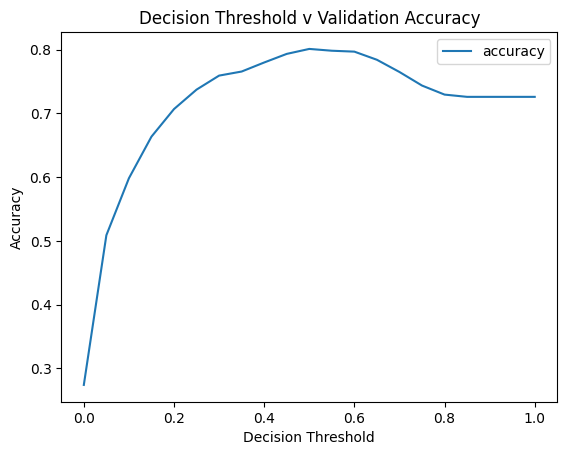

In [17]:
sns.lineplot(threshold_df)
plt.xlabel("Decision Threshold")
plt.ylabel("Accuracy")
plt.title("Decision Threshold v Validation Accuracy")

It turns out we used the best threshold i.e. the one that results in the best accuracy.

In this case we also implemented our own accuracy, however there is a scikit-learn package that will do that for us.

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_val, y_pred >= 0.5)

0.801277501774308

In [20]:
thresholds = np.linspace(0, 1, 21)

threshold_accuracies = {}
for t in thresholds:
    threshold_accuracies[t] = accuracy_score(y_val, y_pred >= t)

When we look at these threshold accuracies, if we predict that all users with a prediction probability more than 1 will churn, all users will not churn. In this case Dummy model still results in a 73% accuracy. This is because we have a class inbalance where most users don't churn. In cases like this, accuracy is not the best method for accessing model performance.

## 4.3 Confusion Table

In [21]:
actual_postitive = (y_val == 1)
actual_negative = (y_val == 0)

In [22]:
t = 0.5
pred_positive = (y_pred >= t)
pred_negative = (y_pred < t)

In [23]:
# Return an array where true if both pred and actual are true
pred_positive & actual_postitive

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [24]:
tp = (pred_positive & actual_postitive).sum()
tn = (pred_negative & actual_negative).sum()

In [25]:
tp, tn

(np.int64(214), np.int64(915))

In [26]:
fp = (pred_positive & actual_negative).sum()
fn = (pred_negative & actual_postitive).sum()

In [27]:
fp, fn

(np.int64(108), np.int64(172))

In [28]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[915, 108],
       [172, 214]])

In [29]:
confusion_matrix / confusion_matrix.sum()

array([[0.64939674, 0.07665011],
       [0.12207239, 0.15188077]])

Accuracy is a sum of the true negative and true positives.

Can also implement confusion matrix with sklearn.

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_val, (y_pred>= 0.5))

array([[915, 108],
       [172, 214]])

## 4.4 Precision and Recall

**Precision** tells us how many positive predictions turned out to be correct: `TP / TP + FP`

**Recall** tells us how many positive predictions were made when compared to all positive actual outcomes: `TP / TP + FN` or `TP / # of Positive actual observations`


In [33]:
# Precision
precision = tp / (tp + fp)
precision

np.float64(0.6645962732919255)

We only correctly identified 66% of churning users predictions.

In [34]:
# Recall
recall = tp / (tp + fn)
recall

np.float64(0.5544041450777202)

This recall tells us that we only correctly identified 55% of positive observations.

For the purpose of identifying churning users, accuracy alone is not sufficient. Precision and recall tells another story.

This can also be implemented with Scikit-learn.

In [35]:
from sklearn.metrics import recall_score, precision_score

In [36]:
recall_score(y_val, (y_pred>= 0.5))

0.5544041450777202

In [37]:
precision_score(y_val, (y_pred>= 0.5))

0.6645962732919255

## 4.5 ROC Curves

Receiver-operating Characteristic Curve, was first used within the context of a radar problem.

Now it uses the FPR and TPR

`FPR = FP/ TN + FP` Made from values of top row of the confusion matrix

`TPR = TP/ FN + TP` Made from values of bottom row of the confusion matrix. This is the same as recall.

ROC curves evaluates these rates at all possible decision thresholds.

In [38]:
tpr = tp / (tp + fn)
tpr

np.float64(0.5544041450777202)

In [40]:
fpr = fp / (fp + tn)
fpr

np.float64(0.10557184750733138)

In [44]:
thresholds = np.linspace(0, 1, 101)
scores = []

for t in thresholds:
    actual_postitive = (y_val == 1)
    actual_negative = (y_val == 0)

    pred_positive = (y_pred >= t)
    pred_negative = (y_pred < t)

    tp = (pred_positive & actual_postitive).sum()
    tn = (pred_negative & actual_negative).sum()
    fp = (pred_positive & actual_negative).sum()
    fn = (pred_negative & actual_postitive).sum()

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    scores.append((t, tp, fp, fn, tn, tpr, fpr))



    

In [46]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn','tpr', 'fpr']
df_scores = pd.DataFrame(scores, columns=columns)

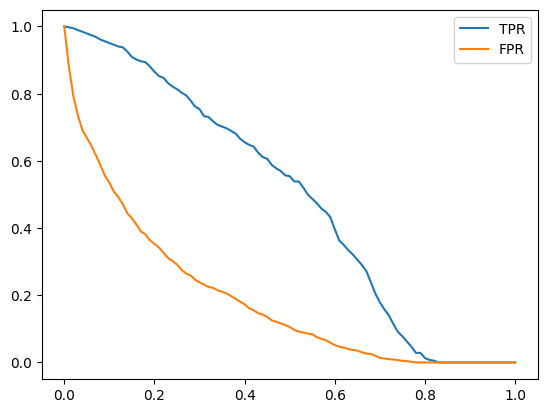

In [51]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

This graph in isolation doesn't tell us much. Lets create a random model to compare.

### Random Model

In [52]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [54]:
rand_acc = ((y_rand >= 0.5) == y_val).mean()
rand_acc

np.float64(0.5017743080198722)

In [55]:
def tpr_fpr_dataframe(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)
    scores = []

    for t in thresholds:
        actual_postitive = (y_val == 1)
        actual_negative = (y_val == 0)

        pred_positive = (y_pred >= t)
        pred_negative = (y_pred < t)

        tp = (pred_positive & actual_postitive).sum()
        tn = (pred_negative & actual_negative).sum()
        fp = (pred_positive & actual_negative).sum()
        fn = (pred_negative & actual_postitive).sum()

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)

        scores.append((t, tp, fp, fn, tn, tpr, fpr))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn','tpr', 'fpr']
    df_scores = pd.DataFrame(scores, columns=columns)

    return df_scores



In [56]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

df_rand

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,382,1013,4,10,0.989637,0.990225
2,0.02,379,993,7,30,0.981865,0.970674
3,0.03,375,979,11,44,0.971503,0.956989
4,0.04,372,969,14,54,0.963731,0.947214
...,...,...,...,...,...,...,...
96,0.96,14,41,372,982,0.036269,0.040078
97,0.97,11,36,375,987,0.028497,0.035191
98,0.98,8,19,378,1004,0.020725,0.018573
99,0.99,6,7,380,1016,0.015544,0.006843


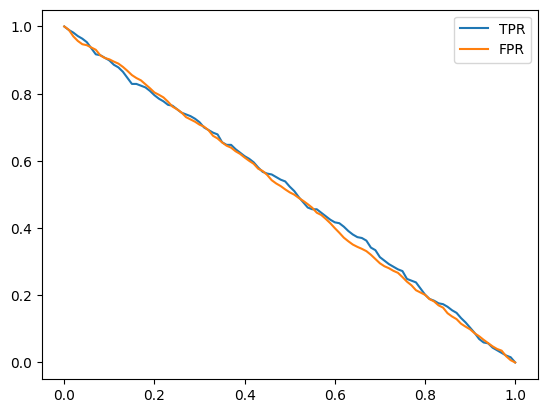

In [57]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### Ideal Model

In [58]:
# How many of each outcome are there?
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [59]:
# Create array where all predicitions are correct.
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [60]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [61]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [62]:
ideal_acc = ((y_ideal_pred >= 0.726) == y_ideal).mean()
ideal_acc

np.float64(1.0)

In [63]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

df_ideal

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,386,1008,0,15,1.000000,0.985337
2,0.02,386,994,0,29,1.000000,0.971652
3,0.03,386,980,0,43,1.000000,0.957967
4,0.04,386,966,0,57,1.000000,0.944282
...,...,...,...,...,...,...,...
96,0.96,57,0,329,1023,0.147668,0.000000
97,0.97,43,0,343,1023,0.111399,0.000000
98,0.98,29,0,357,1023,0.075130,0.000000
99,0.99,15,0,371,1023,0.038860,0.000000


Text(0.5, 1.0, 'Ideal Model, TPR vs FPR')

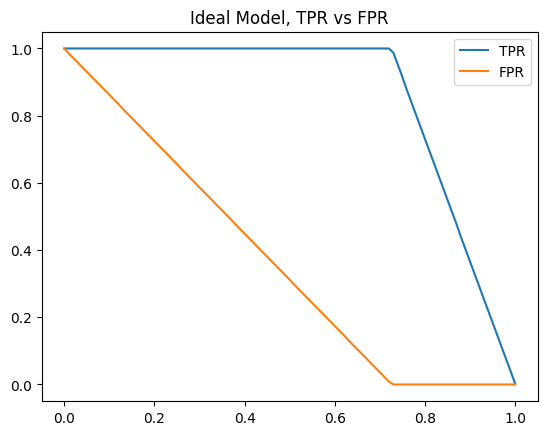

In [68]:


plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()
plt.title("Ideal Model, TPR vs FPR")

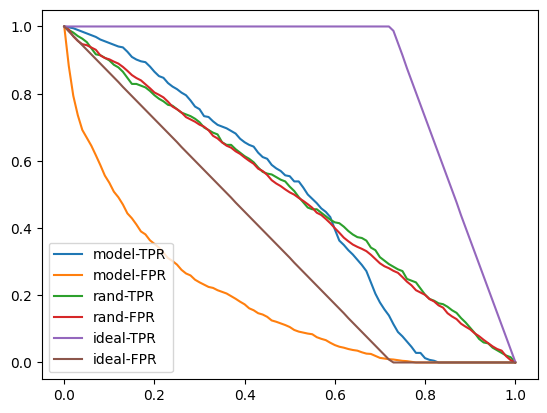

In [69]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='model-TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='model-FPR')

plt.plot(df_rand.threshold, df_rand['tpr'], label='rand-TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='rand-FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='ideal-TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='ideal-FPR')
plt.legend()

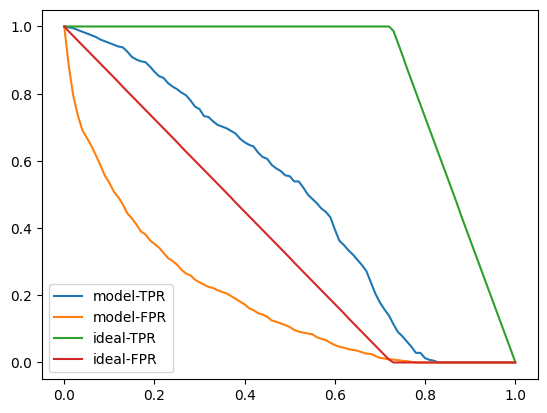

In [70]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='model-TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='model-FPR')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='rand-TPR')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='rand-FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='ideal-TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='ideal-FPR')
plt.legend()

Text(0, 0.5, 'True Positive Rate')

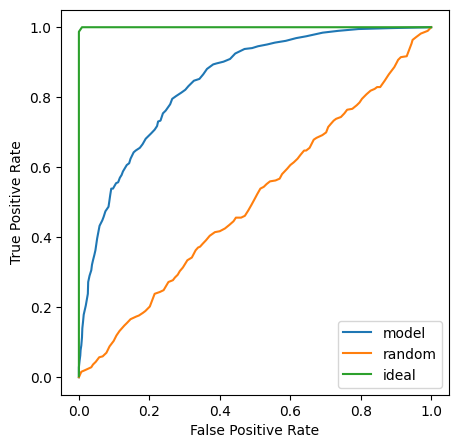

In [77]:
plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr, label="model")
plt.plot(df_rand.fpr, df_rand.tpr, label="random")
plt.plot(df_ideal.fpr, df_ideal.tpr, label="ideal")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

- ideal is the north star. Ideally we want our model line to be as close to this as possible.
- We don't need to plot this. We also don't need to plot the random line, just a diagonal line will suffice. 

Text(0.5, 1.0, 'Validation Churn ROC Curve')

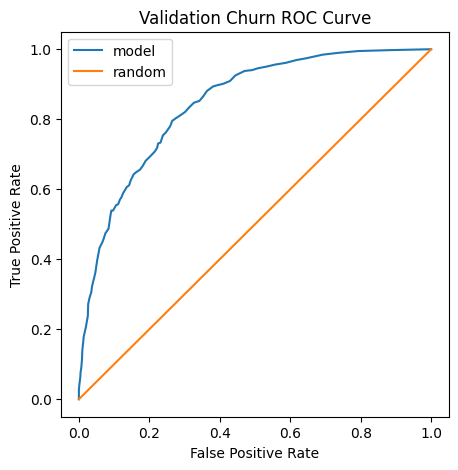

In [79]:
plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr, label="model")
plt.plot([0, 1], [0, 1],label="random")
# plt.plot(df_ideal.fpr, df_ideal.tpr, label="ideal")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation Churn ROC Curve")

The start of the curve represents where the decision threshold is around 1 as we don't predict anyone churning so the false positive rate and true positive rate are low, as no predicitions are meeting the threshold.

A bad model would be close to the random baseline.

If it was below this, we may need to swap positive and negative. It should not be below.


We can also implement using sklearn...

In [80]:
from sklearn.metrics import roc_curve

In [81]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

Text(0.5, 1.0, 'Validation Churn ROC Curve')

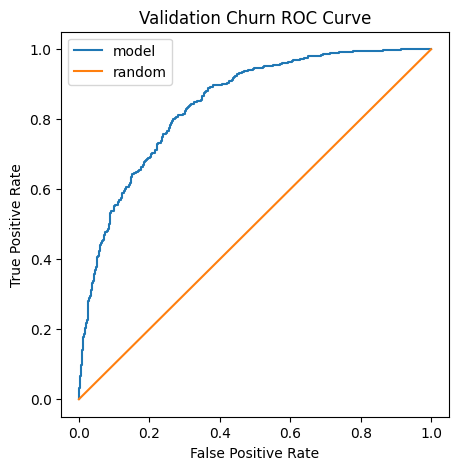

In [82]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label="model")
plt.plot([0, 1], [0, 1],label="random")
# plt.plot(df_ideal.fpr, df_ideal.tpr, label="ideal")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Validation Churn ROC Curve")

## 4.6 ROC AUC

## 4.7 Cross Validation 